# ML Pipeline Overview

## -Outline
      -Problem Statement
      -Machine Learning Problem
      -Data Set
      -Pre-Processing Data
      -Machine Learning Model
      -Model Evaluation
    

## Problem Statement

A Real Estate Agency wants to estimate/project _fair_ prices of houses in a locality. In their daily business, the agency uses various types of parameters/features in evaluating a property and come up with a fair price. The problem with the current approach is that it requires human experty and at times is also subjective.

The agency wants to design a mechanism to estimate/project a _fair_ price of the house based on its features/attirbutes.

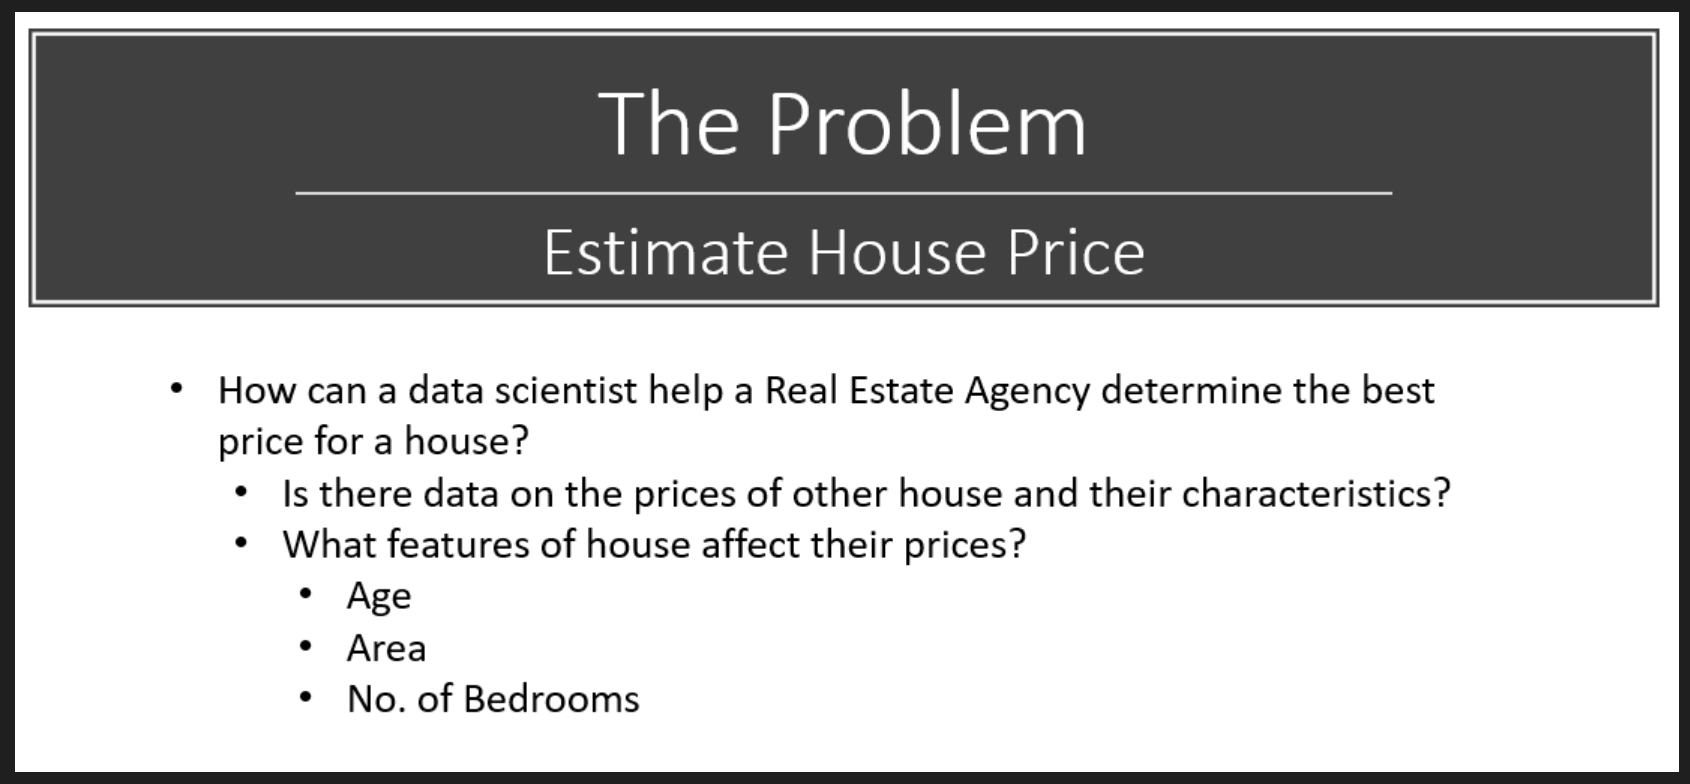

## Machine Learning Problem


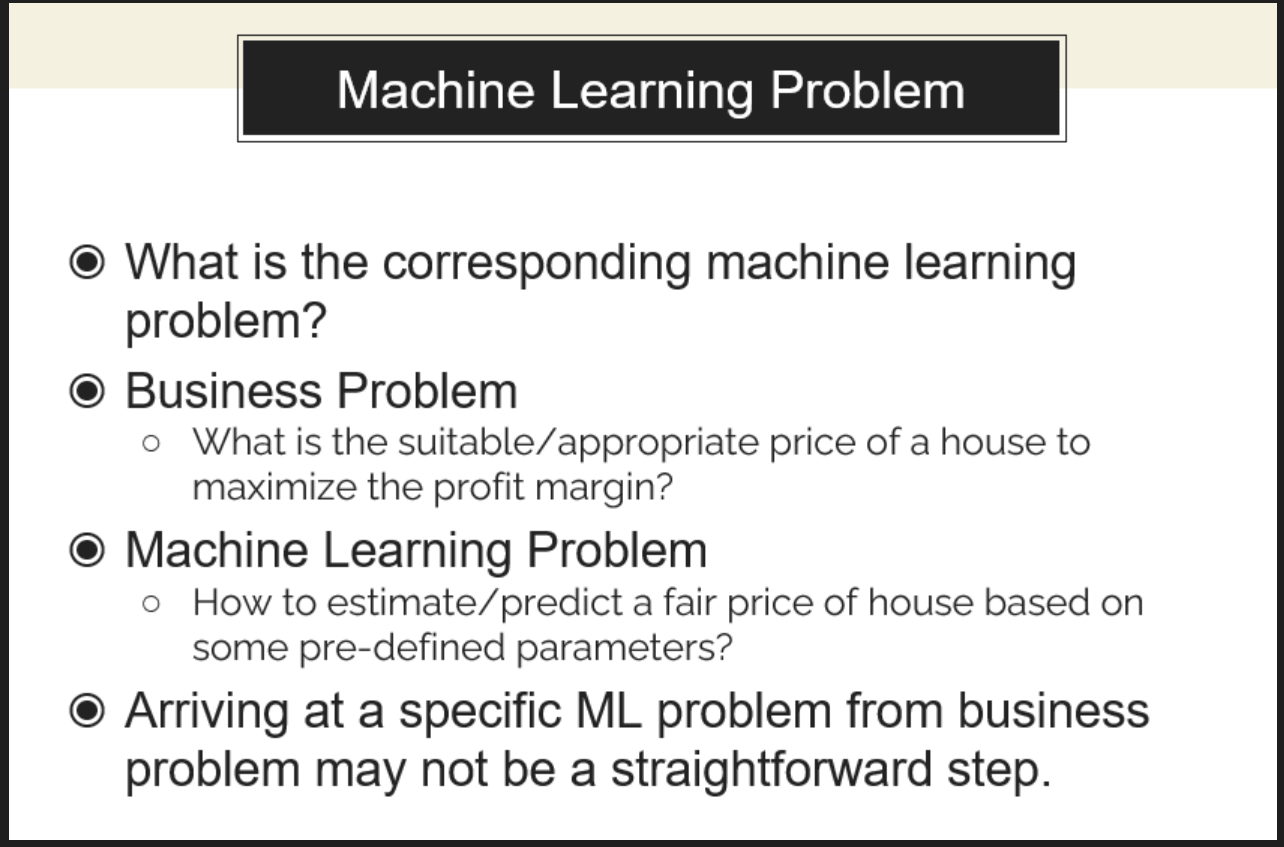

## Data Set

- https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

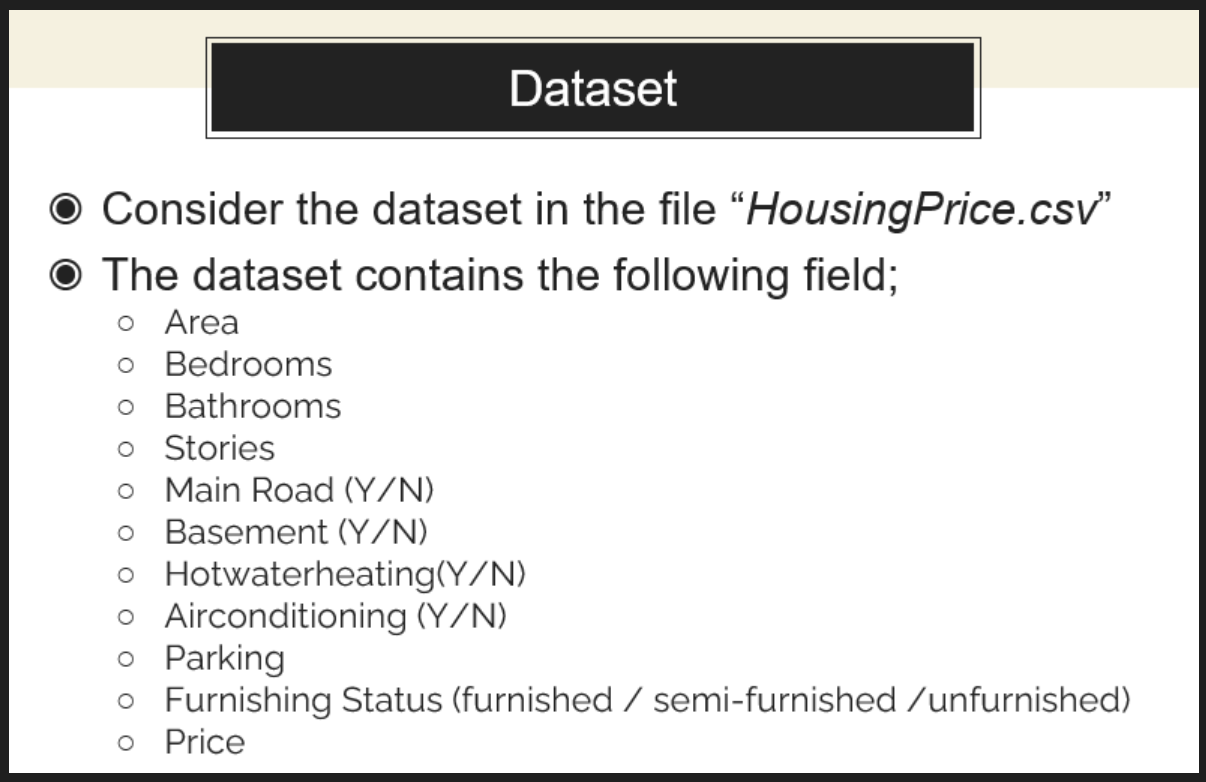

## Reading and Writing Data in Python

In [10]:
import pandas as pd
import numpy as np

In [12]:
file="C:/Users/manas/Downloads/HousingPrices.csv"
df=pd.read_csv(file)
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,8960,?,4,4,yes,no,no,no,yes,3,furnished,12250000
2,?,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000


## Inspect the Data

In [16]:
df.info() #shows non null counts and column type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              545 non-null    object
 1   Bedrooms          545 non-null    object
 2   Bathrooms         545 non-null    object
 3   Stories           545 non-null    object
 4   Mainroad          545 non-null    object
 5   Guestroom         545 non-null    object
 6   Basement          545 non-null    object
 7   Hotwaterheating   545 non-null    object
 8   Airconditioning   545 non-null    object
 9   Parking           545 non-null    object
 10  Furnishingstatus  545 non-null    object
 11  Price             545 non-null    object
dtypes: object(12)
memory usage: 51.2+ KB


In [18]:
df.describe() #summary stats for numerical column

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
count,545,545,545,545,545,545,545,545,545,545,545,545
unique,280,7,5,5,2,2,2,2,2,5,3,220
top,6000,3,1,2,yes,no,no,no,no,0,semi-furnished,4200000
freq,24,297,398,233,468,448,354,520,373,296,227,17


In [20]:
df.columns #list of all column

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Guestroom',
       'Basement', 'Hotwaterheating', 'Airconditioning', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

## Handle Missing Values

In [23]:
df.replace('?', np.nan, inplace=True) #replace ? with NaN
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,8960,NaN,4,4,yes,no,no,no,yes,3,furnished,12250000
2,NaN,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000


In [25]:
df.fillna(method='ffill',inplace=True) #Fill with column mean/median/mode
df.head()

C:\Users\manas\AppData\Local\Temp\ipykernel_24980\1588821802.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True) #Fill with column mean/median/mode


,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,furnished,12250000
2,8960,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000


## Mapping

In [28]:
binary_map = {'yes': 1, 'no': 0}  #define the maping from string to binary
binary_cols = ['Mainroad', 'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning']

df[binary_cols] = df[binary_cols].applymap(lambda x: binary_map.get(x, x)) 
df.head()


C:\Users\manas\AppData\Local\Temp\ipykernel_24980\278849393.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: binary_map.get(x, x))


,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,1,0,0,0,1,2,furnished,13300000
1,8960,4,4,4,1,0,0,0,1,3,furnished,12250000
2,8960,3,2,2,1,0,1,0,0,2,semi-furnished,12250000
3,7500,4,2,2,1,0,1,0,1,3,furnished,12215000
4,7420,4,1,2,1,1,1,0,1,2,furnished,11410000


## Label Encoding

In [31]:
df = pd.get_dummies(df, columns=['Furnishingstatus'], drop_first=True) #convert categories to seperate columns
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Price,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,13300000,False,False
1,8960,4,4,4,1,0,0,0,1,3,12250000,False,False
2,8960,3,2,2,1,0,1,0,0,2,12250000,True,False
3,7500,4,2,2,1,0,1,0,1,3,12215000,False,False
4,7420,4,1,2,1,1,1,0,1,2,11410000,False,False


In [33]:
df["Area"] = pd.to_numeric(df["Area"])

In [35]:
df.dtypes

Area                                int64
Bedrooms                           object
Bathrooms                          object
Stories                            object
Mainroad                            int64
Guestroom                           int64
Basement                            int64
Hotwaterheating                     int64
Airconditioning                     int64
Parking                            object
Price                              object
Furnishingstatus_semi-furnished      bool
Furnishingstatus_unfurnished         bool
dtype: object

In [37]:
df['Furnishingstatus_semi-furnished'] = df['Furnishingstatus_semi-furnished'].astype(int)
df['Furnishingstatus_unfurnished'] = df['Furnishingstatus_unfurnished'].astype(int)
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Price,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,13300000,0,0
1,8960,4,4,4,1,0,0,0,1,3,12250000,0,0
2,8960,3,2,2,1,0,1,0,0,2,12250000,1,0
3,7500,4,2,2,1,0,1,0,1,3,12215000,0,0
4,7420,4,1,2,1,1,1,0,1,2,11410000,0,0


In [39]:
df.dtypes

Area                                int64
Bedrooms                           object
Bathrooms                          object
Stories                            object
Mainroad                            int64
Guestroom                           int64
Basement                            int64
Hotwaterheating                     int64
Airconditioning                     int64
Parking                            object
Price                              object
Furnishingstatus_semi-furnished     int32
Furnishingstatus_unfurnished        int32
dtype: object

In [41]:
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"])
df["Bedrooms"] = pd.to_numeric(df["Bedrooms"])
df["Stories"] = pd.to_numeric(df["Stories"])
df["Parking"] = pd.to_numeric(df["Parking"])
df["Price"] = pd.to_numeric(df["Price"])
df["Area"] = pd.to_numeric(df["Area"])

In [43]:
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Price,Furnishingstatus_semi-furnished,Furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,13300000,0,0
1,8960,4,4,4,1,0,0,0,1,3,12250000,0,0
2,8960,3,2,2,1,0,1,0,0,2,12250000,1,0
3,7500,4,2,2,1,0,1,0,1,3,12215000,0,0
4,7420,4,1,2,1,1,1,0,1,2,11410000,0,0


In [45]:
df.dtypes

Area                               int64
Bedrooms                           int64
Bathrooms                          int64
Stories                            int64
Mainroad                           int64
Guestroom                          int64
Basement                           int64
Hotwaterheating                    int64
Airconditioning                    int64
Parking                            int64
Price                              int64
Furnishingstatus_semi-furnished    int32
Furnishingstatus_unfurnished       int32
dtype: object

## Visualization

Text(0, 0.5, 'Price')

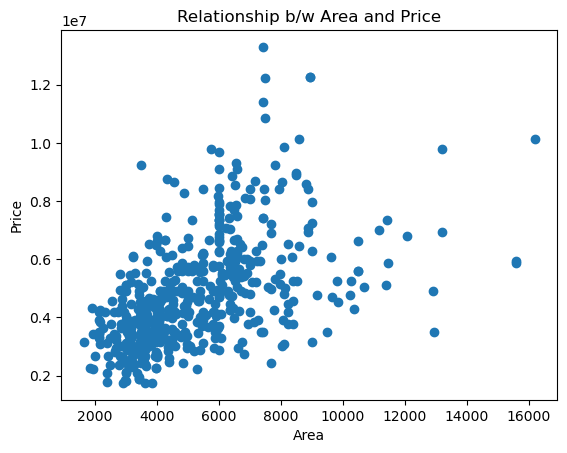

In [47]:
import matplotlib.pyplot as plt   
plt.scatter(df["Area"], df["Price"])
plt.title("Relationship b/w Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

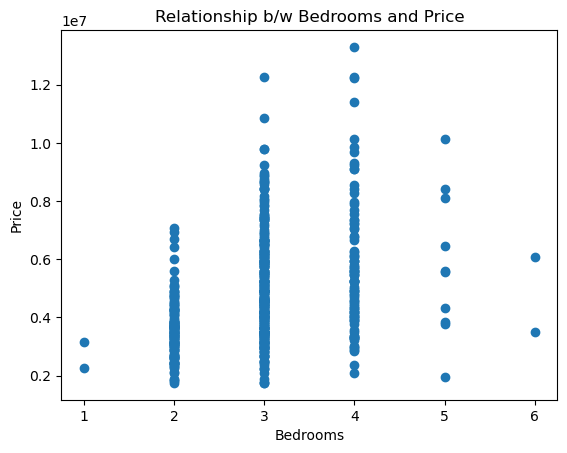

In [49]:
plt.scatter(df["Bedrooms"], df["Price"])
plt.title("Relationship b/w Bedrooms and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Parking')

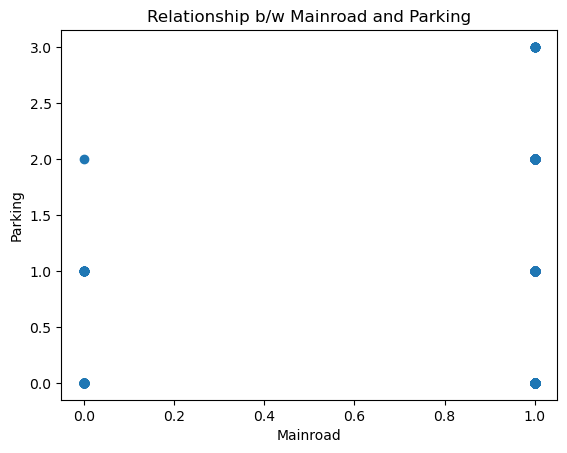

In [51]:
plt.scatter(df["Mainroad"], df["Parking"])
plt.title("Relationship b/w Mainroad and Parking")
plt.xlabel("Mainroad")
plt.ylabel("Parking")

Text(0.5, 1.0, 'Correlation b/w Area and Price')

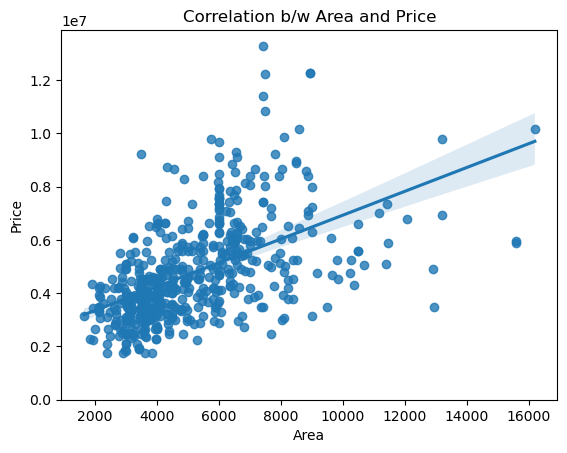

In [53]:
import seaborn as sns
sns.regplot(x="Area", y = "Price", data=df)
plt.ylim(0,)
plt.xlabel("Area")
plt.title("Correlation b/w Area and Price")

In [54]:
data = [10,20,30,40,50]

print(data[2]) # 30
#print(data[5]) # Error
print(data[:])  # All the values
print(data[:3]) # 10, 20, 30
print(data[1:1])
print(data[3:]) # 40, 50
print(data[-1])
print(data[ :-1])

30
[10, 20, 30, 40, 50]
[10, 20, 30]
[]
[40, 50]
50
[10, 20, 30, 40]


In [55]:
df.shape

(545, 13)

In [56]:
X = df.iloc[:,:-1]  # All rows and columns, except the last column

Y=df.iloc[:,-1]     # All rows and last column only

In [57]:
X

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Price,Furnishingstatus_semi-furnished
0,7420,4,2,3,1,0,0,0,1,2,13300000,0
1,8960,4,4,4,1,0,0,0,1,3,12250000,0
2,8960,3,2,2,1,0,1,0,0,2,12250000,1
3,7500,4,2,2,1,0,1,0,1,3,12215000,0
4,7420,4,1,2,1,1,1,0,1,2,11410000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,1820000,0
541,2400,3,1,1,0,0,0,0,0,0,1767150,1
542,3620,2,1,1,1,0,0,0,0,0,1750000,0
543,2910,3,1,1,0,0,0,0,0,0,1750000,0


In [63]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
540    1
541    0
542    1
543    0
544    1
Name: Furnishingstatus_unfurnished, Length: 545, dtype: int32

In [65]:
!pip install scikit-learn

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [67]:
print(X_train.shape)
print(Y_train.shape)

(436, 12)
(436,)


In [68]:
print(X_test.shape)
print(Y_test.shape)

(109, 12)
(109,)


In [69]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

## Model Development

In [70]:
from sklearn import linear_model

In [71]:
model = linear_model.LinearRegression()

In [72]:
# Training the model with train set
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
# The coefficients
print("Intercept: \n", model.intercept_)
print("Coefficients: \n", model.coef_)


Intercept: 
 0.8768817602743502
Coefficients: 
 [ 1.19533293e-05 -3.40169669e-03  3.49160356e-02 -1.85450296e-02
 -8.79882273e-02 -1.12595044e-02 -6.72158306e-02 -1.66993240e-02
 -1.56362534e-02 -4.31575875e-02 -5.41966138e-08 -5.41303127e-01]


In [74]:
# Training Error
from sklearn.metrics import mean_squared_error

Y_train_pred = model.predict(X_train)

train_error = mean_squared_error(Y_train, Y_train_pred)

print("Mean squared error: %.3f" % train_error)

Mean squared error: 0.124


In [75]:
#Test Error
Y_test_pred = model.predict(X_test)

test_error = mean_squared_error(Y_test, Y_test_pred)

print("Mean squared error: %.3f" % test_error)

Mean squared error: 0.151


In [87]:
print(train_error/test_error)

0.8221299537933906
